# How to use a public API

The first original video link, "What is an API?":
https://www.youtube.com/watch?v=2HfSFdPEFRg&t=22

The full project original video link, "Automating Crypto API Pull Using Python":
https://youtu.be/KB2CtEDrglY?si=44S3lBY5ypyp6NlI

The website for this toturial:
https://coinmarketcap.com/

The website's API: 
https://coinmarketcap.com/api/

The Alex's code source:
https://github.com/AlexTheAnalyst/PortfolioProjects/blob/main/Automate%20API%20Extraction%20%2B%20Appending%20Data%20%2B%20Extra%20--%20Project.ipynb




# API Test Notebook

In [8]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Change URL from sandbox domain to pro-api domain.
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# Change limit to see only 15 croptocurrencies.
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
# Used my own API Key copied from developer page
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '925d7425-d9b6-4060-83d5-5d7a5e3186da',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



# When facing the error below for the first time:

    # IOPub data rate exceeded.
    # The Jupyter server will temporarily stop sending output
    # to the client in order to avoid crashing it.
    # To change this limit, set the config variable
    # `--ServerApp.iopub_data_rate_limit`.
    
    # Current values:
    # ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
    # ServerApp.rate_limit_window=3.0 (secs)

# Solution found in stack overflow:
# https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image


{'status': {'timestamp': '2024-02-21T03:26:16.121Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 8828}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10823, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [9]:
type(data)

dict

In [ ]:
import pandas as pd

# Show all columns
pd.set_option('display.max_columns', None)

# Normalize json/dict-type data and save it into a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

# Automating Crypto Website API Pull

In [4]:
# Create a function to include all the functionalities above

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

def api_runner(df):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Change limit to see only 10 croptocurrencies.
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    # Use my own API Key copied from the developer page
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '925d7425-d9b6-4060-83d5-5d7a5e3186da',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df_new = pd.json_normalize(data['data'])
    df_new['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df_new], ignore_index=True)
    return df
    

In [5]:
# Create for loop to test function for data append

import os
from time import time
from time import sleep
import pandas as pd

df = pd.DataFrame()
for i in range(3):
    df = api_runner(df)
    sleep(5)
    print('API Runner completed time(s):',i+1)

print('For loop exited')

API Runner completed time(s): 1
API Runner completed time(s): 2
API Runner completed time(s): 3
For loop exited


In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10824,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963395e+07,1.963395e+07,...,51.7443,1.068369e+12,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
1,1027,Ethereum,ETH,ethereum,8438,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201629e+08,1.201629e+08,...,18.0450,3.482217e+11,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
2,825,Tether USDt,USDT,tether,75085,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.781829e+10,1.006001e+11,...,5.0686,1.005922e+11,None,2024-02-21T18:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-21 12:56:43.533038
3,1839,BNB,BNB,bnb,2070,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495438e+08,1.495438e+08,...,2.8443,5.490632e+10,None,2024-02-21T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.408390e+08,5.700404e+08,...,2.3114,5.769661e+10,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.455860e+10,9.998790e+10,...,1.5229,5.388282e+10,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
6,3408,USDC,USDC,usd-coin,16791,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.800436e+10,2.800436e+10,...,1.4508,2.800625e+10,None,2024-02-21T18:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-21 12:56:43.533038
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.546075e+10,3.664248e+10,...,1.0621,2.601743e+10,None,2024-02-21T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.677503e+08,4.357832e+08,...,0.6889,2.603623e+10,None,2024-02-21T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
9,1958,TRON,TRX,tron,931,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.802842e+10,8.802844e+10,...,0.6348,1.225433e+10,None,2024-02-21T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038


In [20]:
# Only show 5 numbers afer decimal point
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [22]:
# Show all columns
pd.set_option('display.max_columns', None)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10824,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19633950.00000,19633950.00000,False,NaN,1,NaN,NaN,None,2024-02-21T18:56:00.000Z,50874.70393,27941373722.30083,-11.20000,-0.28022,-1.22298,-1.16734,26.03634,15.99614,36.50978,998871393322.87756,51.74430,1068368782633.16003,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
1,1027,Ethereum,ETH,ethereum,8438,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120162904.73201,120162904.73201,True,NaN,2,NaN,NaN,None,2024-02-21T18:56:00.000Z,2897.91375,19387442619.68575,-0.29460,-0.24764,-1.04052,5.36919,22.23587,25.45663,40.64475,348221734156.54449,18.04500,348221734156.53998,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
2,825,Tether USDt,USDT,tether,75085,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97818291517.11946,100600078701.91635,True,NaN,3,NaN,NaN,None,2024-02-21T18:55:00.000Z,0.99992,59132305937.31039,-7.98230,0.01024,0.03263,-0.05825,0.07014,-0.05727,-0.02919,97810586435.05432,5.06860,100592154500.32001,None,2024-02-21T18:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-21 12:56:43.533038
3,1839,BNB,BNB,bnb,2070,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149543795.90549,149543795.90549,False,NaN,4,NaN,NaN,None,2024-02-21T18:55:00.000Z,367.15880,2086221288.42207,43.38030,-0.45934,4.76321,10.36831,18.21178,35.18481,57.68504,54906320591.54836,2.84430,54906320591.55000,None,2024-02-21T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440838956.40389,570040437.89577,True,NaN,5,NaN,NaN,None,2024-02-21T18:56:00.000Z,101.21495,2144418765.00387,-14.75090,-1.18280,-4.83706,-12.49098,17.05776,-1.83507,78.55291,44619493138.15996,2.31140,57696614688.16000,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-21T18:56:00.000Z,0.53883,1365561396.61249,-22.78960,-0.21398,-2.92013,0.23278,0.78771,-13.16935,-12.99441,29397712746.35027,1.52290,53882822433.09000,None,2024-02-21T18:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 12:56:43.533038
6,3408,USDC,USDC,usd-coin,16791,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28004361370.95979,28004361370.95979,False,NaN,7,NaN,NaN,None,2024-02-21T18:56:00.000Z,1.00007,6298277339.85343,-12.70730,-0.00463,0.01669,0.02133,-0.00613,0.00218,0.00433,28006245772.92092,1.45080,28006245772.92000,None,2024-02-21T18:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-21 12:56:43.533038
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35460745456.67800,36642477256.53000,False,NaN,8,NaN,NaN,None,2024-02-21T18:55:00.000Z,0.57817,588798070.37667,-25.81080,-0.88370,-4.24914,0.97575,18.08785,-4.57038,51.32452,20502168840.76818,1.06210,26017433811.75000,None,2024-02-21T18:

In [25]:
# Select only certain columns

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.28022,-1.22298,-1.16734,26.03634,15.99614,36.50978
Ethereum,-0.24764,-1.04052,5.36919,22.23587,25.45663,40.64475
Tether USDt,0.01024,0.03263,-0.05825,0.07014,-0.05727,-0.02919
BNB,-0.45934,4.76321,10.36831,18.21178,35.18481,57.68504
Solana,-1.18280,-4.83706,-12.49098,17.05776,-1.83507,78.55291
XRP,-0.21398,-2.92013,0.23278,0.78771,-13.16935,-12.99441
USDC,-0.00463,0.01669,0.02133,-0.00613,0.00218,0.00433
Cardano,-0.88370,-4.24914,0.97575,18.08785,-4.57038,51.32452
Avalanche,-0.48934,-4.31911,-13.00327,19.52514,-20.41486,75.19155


In [28]:
# Better visualization: Stack version of selected columns
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.28022
             quote.USD.percent_change_24h    -1.22298
             quote.USD.percent_change_7d     -1.16734
             quote.USD.percent_change_30d    26.03634
             quote.USD.percent_change_60d    15.99614
             quote.USD.percent_change_90d    36.50978
Ethereum     quote.USD.percent_change_1h     -0.24764
             quote.USD.percent_change_24h    -1.04052
             quote.USD.percent_change_7d      5.36919
             quote.USD.percent_change_30d    22.23587
             quote.USD.percent_change_60d    25.45663
             quote.USD.percent_change_90d    40.64475
Tether USDt  quote.USD.percent_change_1h      0.01024
             quote.USD.percent_change_24h     0.03263
             quote.USD.percent_change_7d     -0.05825
             quote.USD.percent_change_30d     0.07014
             quote.USD.percent_change_60d    -0.05727
             quote.USD.percent_change_90

In [29]:
type(df4)

pandas.core.series.Series

In [30]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.28022
            quote.USD.percent_change_24h  -1.22298
            quote.USD.percent_change_7d   -1.16734
            quote.USD.percent_change_30d  26.03634
            quote.USD.percent_change_60d  15.99614
            quote.USD.percent_change_90d  36.50978
Ethereum    quote.USD.percent_change_1h   -0.24764
            quote.USD.percent_change_24h  -1.04052
            quote.USD.percent_change_7d    5.36919
            quote.USD.percent_change_30d  22.23587
            quote.USD.percent_change_60d  25.45663
            quote.USD.percent_change_90d  40.64475
Tether USDt quote.USD.percent_change_1h    0.01024
            quote.USD.percent_change_24h   0.03263
            quote.USD.percent_change_7d   -0.05825
            quote.USD.percent_change_30d   0.07014
            quote.USD.percent_change_60d  -0.05727
            quote.USD.percent_change_90d  -0.02919
BNB         quote.USD.percent_change_1h   -0.45934
            quote.USD.percent_change_24h   4.76321
            quote.USD.percent_change_7d   10.36831
            quote.USD.percent_change_30d  18.21178
            quote.USD.percent_change_60d  35.18481
            quote.USD.percent_change_90d  57.68504
Solana      quote.USD.percent_change_1h   -1.18280
            quote.USD.percent_change_24h  -4.83706
            quote.USD.percent_change_7d  -12.49098
            quote.USD.percent_change_30d  17.05776
            quote.USD.percent_change_60d  -1.83507
            quote.USD.percent_change_90d  78.55291
XRP         quote.USD.percent_change_1h   -0.21398
            quote.USD.percent_change_24h  -2.92013
            quote.USD.percent_change_7d    0.23278
            quote.USD.percent_change_30d   0.78771
            quote.USD.percent_change_60d -13.16935
            quote.USD.percent_change_90d -12.99441
USDC        quote.USD.percent_change_1h   -0.00463
            quote.USD.percent_change_24h   0.01669
            quote.USD.percent_change_7d    0.02133
            quote.USD.percent_change_30d  -0.00613
            quote.USD.percent_change_60d   0.00218
            quote.USD.percent_change_90d   0.00433
Cardano     quote.USD.percent_change_1h   -0.88370
            quote.USD.percent_change_24h  -4.24914
            quote.USD.percent_change_7d    0.97575
            quote.USD.percent_change_30d  18.08785
            quote.USD.percent_change_60d  -4.57038
            quote.USD.percent_change_90d  51.32452
Avalanche   quote.USD.percent_change_1h   -0.48934
            quote.USD.percent_change_24h  -4.31911
            quote.USD.percent_change_7d  -13.00327
            quote.USD.percent_change_30d  19.52514
            quote.USD.percent_change_60d -20.41486
            quote.USD.percent_change_90d  75.19155
TRON        quote.USD.percent_change_1h   -0.14020
            quote.USD.percent_change_24h   0.72908
            quote.USD.percent_change_7d    7.89890
            quote.USD.percent_change_30d  27.29198
            quote.USD.percent_change_60d  30.50408
            quote.USD.percent_change_90d  36.87333

In [32]:
type(df5)

pandas.core.frame.DataFrame

In [38]:
a = df5.count().values[0]
a

60

In [43]:
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.28022
            quote.USD.percent_change_24h  -1.22298
            quote.USD.percent_change_7d   -1.16734
            quote.USD.percent_change_30d  26.03634
            quote.USD.percent_change_60d  15.99614
            quote.USD.percent_change_90d  36.50978
Ethereum    quote.USD.percent_change_1h   -0.24764
            quote.USD.percent_change_24h  -1.04052
            quote.USD.percent_change_7d    5.36919
            quote.USD.percent_change_30d  22.23587
            quote.USD.percent_change_60d  25.45663
            quote.USD.percent_change_90d  40.64475
Tether USDt quote.USD.percent_change_1h    0.01024
            quote.USD.percent_change_24h   0.03263
            quote.USD.percent_change_7d   -0.05825
            quote.USD.percent_change_30d   0.07014
            quote.USD.percent_change_60d  -0.05727
            quote.USD.percent_change_90d  -0.02919
BNB         quote.USD.percent_change_1h   -0.45934
            quote.USD.percent_change_24h   4.76321
            quote.USD.percent_change_7d   10.36831
            quote.USD.percent_change_30d  18.21178
            quote.USD.percent_change_60d  35.18481
            quote.USD.percent_change_90d  57.68504
Solana      quote.USD.percent_change_1h   -1.18280
            quote.USD.percent_change_24h  -4.83706
            quote.USD.percent_change_7d  -12.49098
            quote.USD.percent_change_30d  17.05776
            quote.USD.percent_change_60d  -1.83507
            quote.USD.percent_change_90d  78.55291
XRP         quote.USD.percent_change_1h   -0.21398
            quote.USD.percent_change_24h  -2.92013
            quote.USD.percent_change_7d    0.23278
            quote.USD.percent_change_30d   0.78771
            quote.USD.percent_change_60d -13.16935
            quote.USD.percent_change_90d -12.99441
USDC        quote.USD.percent_change_1h   -0.00463
            quote.USD.percent_change_24h   0.01669
            quote.USD.percent_change_7d    0.02133
            quote.USD.percent_change_30d  -0.00613
            quote.USD.percent_change_60d   0.00218
            quote.USD.percent_change_90d   0.00433
Cardano     quote.USD.percent_change_1h   -0.88370
            quote.USD.percent_change_24h  -4.24914
            quote.USD.percent_change_7d    0.97575
            quote.USD.percent_change_30d  18.08785
            quote.USD.percent_change_60d  -4.57038
            quote.USD.percent_change_90d  51.32452
Avalanche   quote.USD.percent_change_1h   -0.48934
            quote.USD.percent_change_24h  -4.31911
            quote.USD.percent_change_7d  -13.00327
            quote.USD.percent_change_30d  19.52514
            quote.USD.percent_change_60d -20.41486
            quote.USD.percent_change_90d  75.19155
TRON        quote.USD.percent_change_1h   -0.14020
            quote.USD.percent_change_24h   0.72908
            quote.USD.percent_change_7d    7.89890
            quote.USD.percent_change_30d  27.29198
            quote.USD.percent_change_60d  30.50408
            quote.USD.percent_change_90d  36.87333

In [49]:
# Assign index for each row

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28022
1,Bitcoin,quote.USD.percent_change_24h,-1.22298
2,Bitcoin,quote.USD.percent_change_7d,-1.16734
3,Bitcoin,quote.USD.percent_change_30d,26.03634
4,Bitcoin,quote.USD.percent_change_60d,15.99614
5,Bitcoin,quote.USD.percent_change_90d,36.50978
6,Ethereum,quote.USD.percent_change_1h,-0.24764
7,Ethereum,quote.USD.percent_change_24h,-1.04052
8,Ethereum,quote.USD.percent_change_7d,5.36919
9,Ethereum,quote.USD.percent_change_30d,22.23587


In [50]:
df7 = df6.rename(columns={'level_1':'percent_change' })
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28022
1,Bitcoin,quote.USD.percent_change_24h,-1.22298
2,Bitcoin,quote.USD.percent_change_7d,-1.16734
3,Bitcoin,quote.USD.percent_change_30d,26.03634
4,Bitcoin,quote.USD.percent_change_60d,15.99614
5,Bitcoin,quote.USD.percent_change_90d,36.50978
6,Ethereum,quote.USD.percent_change_1h,-0.24764
7,Ethereum,quote.USD.percent_change_24h,-1.04052
8,Ethereum,quote.USD.percent_change_7d,5.36919
9,Ethereum,quote.USD.percent_change_30d,22.23587


In [52]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Update visualization for a better view

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.28022
1,Bitcoin,24h,-1.22298
2,Bitcoin,7d,-1.16734
3,Bitcoin,30d,26.03634
4,Bitcoin,60d,15.99614
5,Bitcoin,90d,36.50978
6,Ethereum,1h,-0.24764
7,Ethereum,24h,-1.04052
8,Ethereum,7d,5.36919
9,Ethereum,30d,22.23587


C:\Users\DentonJayBowenLiu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


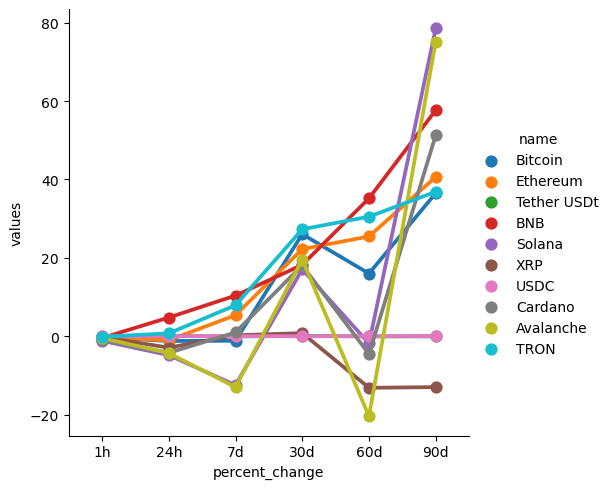

In [57]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
# If only see specific columns

df10 = df[['name','quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,50874.70393,2024-02-21 12:56:43.533038
10,Bitcoin,50874.70393,2024-02-21 12:56:49.274831
20,Bitcoin,50874.70393,2024-02-21 12:56:55.020708


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

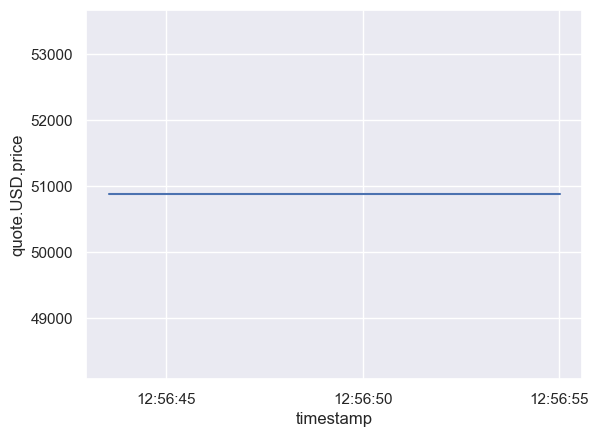

In [61]:
# Visualize the data above

sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price', data = df10)

# Automating Crypto Website API Pull (Extend)

## Save data into a CSV file instead of a dataframe

In [17]:
# Modify the api_runner(df) function to save data into a CSV file instead return a dataframe

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

# Hardcode the default file path
def api_runner_file(filepath='D:\\DentonJayBowenLiu\\Documents\\Jupyter-Notebook\\AlexDataAnalyst\\Automating_Crypto_Website_API_Pull\\API.csv'):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Change limit to see only 10 croptocurrencies.
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    # Use my own API Key copied from the developer page
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '925d7425-d9b6-4060-83d5-5d7a5e3186da',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    # Check if API.csv does not exist then create one
    if not os.path.isfile(filepath):
        df.to_csv('API.csv', header='column_names')
    # If the file exists
    else:
        # If file is empty then add the value as first time
        with open(filepath, 'r') as file_obj:
            # read first character
            first_char = file_obj.read(1)
            if not first_char:
                df.to_csv('API.csv', header='column_names')
                return
        # If not an empty file then append the data to the file
        df.to_csv(filepath, mode='a', header=False)
    
    

In [16]:
# Create for loop to test function to see if data load into the file

import os
from time import time
from time import sleep
import pandas as pd

for i in range(3):
    api_runner_file()
    sleep(5)
    print('API Runner File version completed time(s):',i+1)

print('For loop exited')

API Runner File version completed time(s): 1
API Runner File version completed time(s): 2
API Runner File version completed time(s): 3
For loop exited
